In [1]:
# this file calculates raster statistics of a specified polygon. 

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': 0.0,
 'width': 591,
 'height': 663,
 'count': 234,
 'crs': CRS.from_epsg(32719),
 'transform': Affine(29.99981, 0.0, 766641.15,
        0.0, -30.0, 6997860.133)}

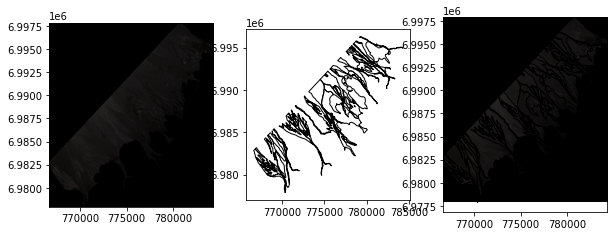

In [4]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import rasterstats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#read in shapefile 
image_file = r'C:\Users\htccr\Documents\Aconquija\imagery\prisma\PRS_L2D_STD_20210815143130_20210815143134_0001\exports\clipped\PRIMSA_20210815_stack_ortho_clip-surfaces.tif'
polygons_file = r'C:\Users\htccr\Documents\Aconquija\GIS_data\ages_surfaces.shp'

# read in files
image = rasterio.open(image_file, mode = 'r')
polygons = gpd.read_file(polygons_file)

# plot as check
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,5))
show(image, ax = ax1)

polygons.plot(ax = ax2, facecolor = 'none', edgecolor = 'black')

show(image, ax = ax3)
polygons.plot(ax = ax3, facecolor = 'none', edgecolor = 'black')

# image metadata
image.meta

In [5]:
# assign raster values to a numpy array (band)
target_band = 1 # band to calulate statistics from
image_array = image.read(target_band)
affine = image.transform # record affine for stats below

In [6]:
# calculate zonal statistics
mean_pix = rasterstats.zonal_stats(polygons, image_array, affine = affine,
                                     stats = ['mean', 'std'],
                                      nodata = 0.0,
                                     geojson_out = True)

# check
print(len(mean_pix)) # check length of list
mean_pix[0]['properties'] # print 'properties' of the first item in the list and check for new stats


40


{'Unit': 'Q1.5',
 'abs_age': 286.8,
 'age_n': 1,
 'age_sd': 10.84,
 'area': 524369,
 'fan': 'Po',
 'unique': '1PoAv',
 'mean': 0.0627873701324731,
 'std': 0.018695143004126395}

In [7]:
# extracting statistics form list
abs_age_list = []
mean_pix_list = [] # create empty list to extract and store new statistics
i = 0 # create counter

# extract new statistics in loop
while i < len(mean_pix):
    #abs_age_list.append(mean_pix[i]['properties']['abs_age'])
    mean_pix_list.append(mean_pix[i]['properties'])
    i = i + 1 # iterate i + 1 through the length of the list i.e. polygon stats
    
    
# transfer information from list to pandas dataframe
target_band_mean = pd.DataFrame(mean_pix_list)

print(target_band_mean)

      Unit     abs_age  age_n    age_sd     area fan       unique      mean  \
0     Q1.5  286.800000      1  10.84000   524369  Po        1PoAv  0.062787   
1     Q1.5  314.485000      2  16.72500    69119  Ya        2YaAv  0.043981   
2       Q4   78.500000      1   7.50000   210904  Ya        3YaQ4  0.043040   
3    Q2.5a  116.140000      1   4.57000   506710  Za        5ZaAv  0.076806   
4    Q2.5a  135.860000      1   5.52000   240850  Za        7ZaAv  0.078251   
5    Q2.5a  101.840000      1   3.71000  2884184  Za        8ZaAv  0.057099   
6       Q7    5.106670      3   0.71983   929009  Po       11PoQ7  0.074055   
7       Q5   31.743299      3   7.53388  1109014  Po       13PoQ5  0.081047   
8       Q2  212.154007      9  24.61770  6757778  Po       17PoQ2  0.059472   
9       Q1  319.220001      1  12.78000  2104392  Po       19PoQ1  0.064816   
10      Q2  238.470001      2  15.21000   396081  Ya       28YaQ2  0.055717   
11      Q6   16.480000      2   0.16000  1359687  Ya

In [8]:
# LOOP IS NOT RECOGNIZING THE LAYER_N VALUE< TRYING TO POPULATE LISTS FOR EACH BAND
# GENERATE LIST OF ABSOLUTE AGES AND AGE SD
affine = image.transform # record affine for stats below

age_stats = rasterstats.zonal_stats(polygons, image_array, affine = affine,
                                    stats = ['mean'], # choose stats
                                    nodata = 0.0, # identidy nodata value
                                    geojson_out = True)


# extract age statistics from list
abs_age_list = []
age_std_list = []
i = 0 # create counter

# extract new statistics in loop
while i < len(age_stats):
    abs_age_list.append(age_stats[i]['properties']['abs_age'])
    age_std_list.append(age_stats[i]['properties']['age_sd'])
    i = i + 1 # iterate i + 1 through the length of the list i.e. polygon stats


# CALCULATE BAND STATISTICS IN LOOP
band_count = image.meta['count']
band_mean_list = [[] for i in range(band_count)]
band_std_list = [[] for i in range(band_count)]
  
# calculate and extract band statisitcs from list
for layer_n in range(0,image.meta['count']):
    
    # assign raster values to a numpy array (loop through bands)
    image_array = image.read(layer_n + 1)
    new_stats = rasterstats.zonal_stats(polygons, image_array, affine = affine,
                                       stats = ['mean', 'std'], # choose stats
                                       nodata = 0.0, # identidy nodata value
                                       geojson_out = True)

    while i < len(new_stats):
        band_stats[layer_n].append(new_stats[i]['properties']['mean'])
        #band_std_list[layer_n].append(new_stats[i]['properties']['std'])
        i = i + 1 # iterate i + 1 through the length of the list
        
        
# create a dataframe with abs_age, age_sd, band means, band stds, for bands 1-9. 
# plot ratios against age

In [9]:
# GENERATE AGE STATISTICS

# assign raster values to a numpy array (band)
target_band = 1 # band to calulate statistics from
image_array = image.read(target_band)
affine = image.transform # record affine for stats below

# GENERATE LIST OF ABSOLUTE AGES AND AGE SD
affine = image.transform # record affine for stats below

age_stats = rasterstats.zonal_stats(polygons, image_array, affine = affine,
                                    stats = ['mean'], # choose stats
                                    nodata = 0.0, # identidy nodata value
                                    geojson_out = True)


# extract age statistics from list
abs_age_list = []
age_std_list = []
unit = []
i = 0 # create counter

# extract new statistics in loop
while i < len(age_stats):
    abs_age_list.append(age_stats[i]['properties']['abs_age'])
    age_std_list.append(age_stats[i]['properties']['age_sd'])
    unit.append(age_stats[i]['properties']['Unit'])
    i = i + 1 # iterate i + 1 through the length of the list i.e. polygon stats

print(len(abs_age_list))

40


In [8]:
# GENERATE BAND STATISTICS

target_band = 2 # band to calulate statistics from
image_array = image.read(target_band)

# calculate zonal statistics
mean_pix = rasterstats.zonal_stats(polygons, image_array, affine = affine,
                                     stats = ['mean', 'std'],
                                      nodata = 0.0,
                                     geojson_out = True)


# extracting statistics form list
mean_pix_list = [] # create empty list to extract and store new statistics
i = 0 # create counter

# extract new statistics in loop
while i < len(mean_pix):
    mean_pix_list.append(mean_pix[i]['properties']['mean'])
    i = i + 1 # iterate i + 1 through the length of the list i.e. polygon stats
    
    
# transfer information from list to pandas dataframe
target_a = mean_pix_list

In [9]:
# GENERATE BAND STATISTICS

target_band = 9 # band to calulate statistics from
image_array = image.read(target_band)

# calculate zonal statistics
mean_pix = rasterstats.zonal_stats(polygons, image_array, affine = affine,
                                     stats = ['mean', 'std'],
                                      nodata = 0.0,
                                     geojson_out = True)


# extracting statistics form list
mean_pix_list = [] # create empty list to extract and store new statistics
i = 0 # create counter

# extract new statistics in loop
while i < len(mean_pix):
    mean_pix_list.append(mean_pix[i]['properties']['mean'])
    i = i + 1 # iterate i + 1 through the length of the list i.e. polygon stats
    
    
# transfer information from list to pandas dataframe
target_b = mean_pix_list

<AxesSubplot:title={'center':'w/o Modern & R.Avalanch'}, xlabel='age', ylabel='b6b2'>

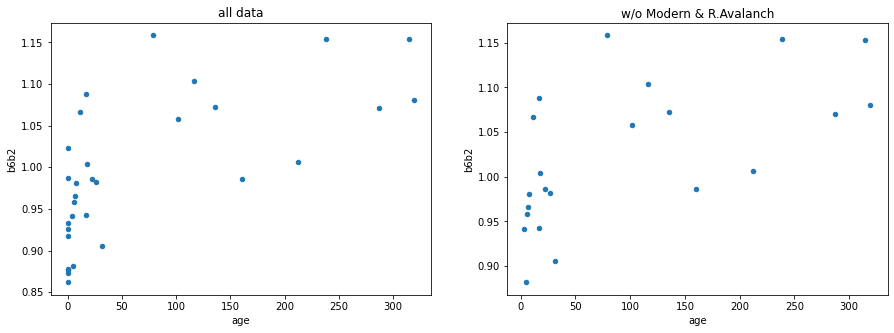

In [10]:
final = pd.DataFrame(
    {'age': abs_age_list,
     'unit': unit,
     'band2': target_a,
     'band6': target_b
    })

b6b2 = final.band6/final.band2
final['b6b2'] = b6b2

final_clean = final.drop(final[final.unit == "Modern"].index)
#final_clean = final_clean.drop(final_clean[final_clean.unit == "Av"].index)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
final.plot(x = 'age', y = 'b6b2', kind = 'scatter', ax = ax1, title = 'all data')
final_clean.plot(x = 'age', y = 'b6b2', kind = 'scatter', ax = ax2, title = 'w/o Modern & R.Avalanch')


In [11]:
# DO NOT RUN
WV3 = final_clean

<AxesSubplot:title={'center':'Landsat8'}, xlabel='age', ylabel='b6b2'>

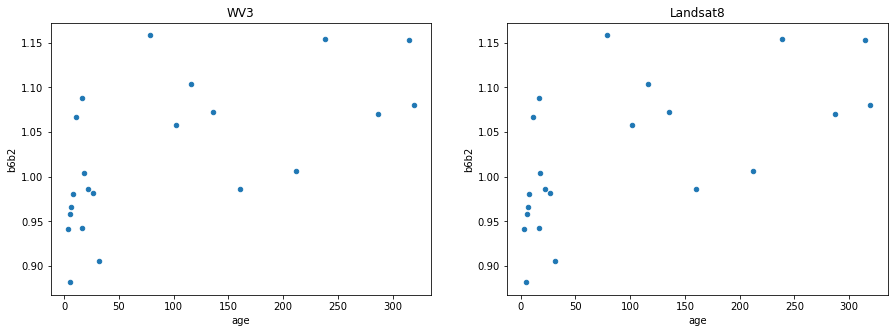

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
WV3.plot(x = 'age', y = 'b6b2', kind = 'scatter', ax = ax1, title = 'WV3')
final_clean.plot(x = 'age', y = 'b6b2', kind = 'scatter', ax = ax2, title = 'Landsat8')